In [2]:
import pandas as pd

test = pd.read_csv("data/test.csv")
train = pd.read_csv("data/train.csv")

# Generate Image from data

In [3]:
from sklearn.model_selection import train_test_split
from PIL import Image
import numpy as np
import math

width = int(math.sqrt(len(test.columns)))
height = width

def generate_random_number_image(index: int, dataset=test) -> Image:
    data = dataset.iloc[index]
    arr = np.array(data, dtype=np.uint8).reshape(width, height)
    
    image = Image.fromarray(arr, 'L')
    image = image.resize((225, 225), Image.Resampling.LANCZOS)
    return image


train_Y = train.label
train_X = train.drop("label", axis=1)

train_X, test_X, train_Y, test_Y = train_test_split(train_X, train_Y, test_size=0.2, random_state=0)

### Sklearn DecisionTreeRegressor

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

model_tree = DecisionTreeRegressor(random_state=0)
model_tree.fit(train_X, train_Y)

DecisionTreeRegressor(random_state=0)

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

prediction = model_tree.predict(test_X)
print(mean_absolute_error(prediction, test_Y))
print(mean_squared_error(prediction, test_Y))

0.5698809523809524
2.516785714285714


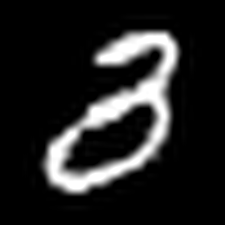

In [33]:
import random
random_num = random.randint(0, 30_000-1)
generate_random_number_image(index=random_num, flash=False)

In [34]:
model_tree.predict(test.iloc[random_num:random_num+1])

array([3.])

In [11]:
solution = pd.DataFrame({'ImageID': prediction, 'Label': list(range(1, len(prediction)))})
print(solution)
# print(np.arra
# y([range(1, len(prediction) + 1))

ValueError: Found input variables with inconsistent numbers of samples: [8400, 28000]

In [38]:
print(0.56**2)

0.31360000000000005
